# Proton Shock Acceleration in Laser Plasma Interactions

Two acceleration ion acceleration mechanisms:

* proton acceleration due to the ambipolar fields arising in the free expansion of the strongly heated electrons at the front and the rear of the target;

* proton acceleration in a collisionless, electrostatic shock formed at the front of the target; 

### Sheath Acceleration

The laser interacts with the target producing hot electrons, that penetrate through the target. On the target rear surface they form a debye sheath that acts as a cathod. The electric field induced by the cathod ionizes the atoms at the rar surface and accelerates the ions.
Assuming that the electric field in the sheath region is constant over time scales comparable with the shock crossing time, and given by:

$$E_{sheath} \approx \frac{k_B T_{hot}}{e \lambda_D} \quad,\quad \lambda_D =\sqrt{\frac{k_B T_{hot}}{4\pi e^2n_{hot}}}$$

We get the following velocity for the ions:

$$v_{sheath ions}(t) \approx \frac{ZeE_{sheath}t}{m_i}$$

### Electrostatic Shock acceleration

The ponderomotive force of the laser lauches an electrostatic, laminar shock from the front surface of the target, and the structure propagates almost undisturbed across the target.
The shock can pick up ions and reflect them to velocityes $\approx 2 v_{shock}$
To estimate the velocity of the ions, we use the conservation of momentum (negleting the electron momentum due to the small mass). the photon momentum is given by $\hbar k$ and so the total incident momentum fluxis given by $\frac{\hbar k I}{\hbar \omega_0}=\frac{I}{c}$. The total momentum delivered to the plasma id given by $\frac{I(1+\eta)}{c}$ , where $\eta$ is the laser power reflected and I is the intensity of the laser. The momentum of the ions is $m_i n_i v_i^2$, where $m_i$ is the ions mass, $n_i$ is the ion plasma density and so:

$$\frac{(1+\eta)I}{c}=m_in_iv_i^2$$

solving for $v_i$:

$$ \frac{v_{shock}}{c}\approx\frac{v_{piston}}{c}=\sqrt{\frac{(1+\eta)I}{n_im_ic^3}}$$

The sound speed $c_s$ is given by (given that when $\lambda= 1\mu m$ and $a_0>1$, $K_B T_{hot} \approx 0.8 a_0 m_e c^2$):

$$ \frac{c_s}{c}=\sqrt{\frac{k_BT_{hot}}{m_i c^2}}=\sqrt{\frac{0.8 a_0  m_e}{m_i}}$$

March number M is:
$$M=\frac{v_{shock}}{c_s} \approx \sqrt{\frac{(1+\eta)}{0.4}\frac{n_c}{n_i}a_0}$$




The shock formation time is of a few $\frac{2\pi}{\omega_p}$



### When shock formation is seen 

Acceleration in the shock becomes the dominant accelaration mechanism, when the protons accelarated in the shock reach the sheath acceleration region at the end of the target with higher velocity thatn the ions that were accelerated in the sheath region.

 $$2 v_{shock} \gtrsim v_{sheath ions}$$
 
 $$2 v_{shock} \gtrsim \frac{Ze k_B T_{hot}  L_{target} }{2 v_{shock} m_i e \lambda_D}$$
 
 $$L_{target}\lesssim \frac{4 v_{shock}^2 m_i \lambda_D }{Z e k_B T_{hot}}=\frac{4 M^2 \lambda_D}{Z}$$
 
 
 For thin targets, the shock acceleration dominates. 
 A high enough laser intensity to pistonlike drive the ions at the front side of the target to high Mach numbers, and strong electron heating in the shock formation region, in order to guarantee high $c_s$ such that $v_{piston} \approx c_s$, thus guaranteeing a short shock formation time.



### Simulation time step and  grid step

To achieve debye shielding, theres must be enough particles within one Debye length $\lambda_D$, which must be bigger that the grid step. The grid step has to be big enough so that a particle does not cross a whole cell in one time step. The time step must also be small enough to see the smallest oscillation.
The laser hits the overdense plasma and penetrates a thin layer somewhat larger than $c/\omega_p$. , so the gid step must be smaller thatn this value.

$$\frac{N_{particles}}{\lambda_D}\gtrsim50 $$

$$ \Delta x \lesssim \lambda_D$$

$$ \Delta x \gtrsim c \Delta t$$

$$ \Delta t \lesssim \frac{0.5}{\omega_{max}}$$

$$ \Delta x \lesssim \frac{c}{\omega_p}$$



## Simulation in 1 Dimention

Using the same parameters as the article: $\lambda_0 = 1\mu m = 2\pi \frac{c}{\omega_0}$, so $\omega_0 = \frac{2\pi c}{\lambda_0}=1.88\times10^{15}s^{-1}$, and so $1 fs = 1.885 \frac{1}{\omega_0}$.

The number of particle sper cell is 32.

The target is cold: $T_e=T_i=0$.

Initial position: 500$c/\omega_0$ and the final position is 640$c/\omega_0$.

The target density is $n_{e0}=10n_{cr} => \omega_{e0}=\sqrt{10}\omega_0$

The cell size is given by:
$\frac{c}{10 \omega_{pe0}}=\frac{c}{10 \sqrt{10} \omega_0} = 0.032 \frac{c}{\omega_0}$

The laser pulse duration $\tau_{laser}=100fs= 188.5 1/\omega_0$ and $a_0=16$




In [1]:
import numpy as np
import em1d
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from ipywidgets import interactive, widgets, fixed

In [2]:
dt=0.03 
tmax=1000 #final time 

nx=int((800)/0.032)   #number of cells 
box=800  #size of simulation box

ndump=200 #the function sim_report() is called afeter ndump iterations


In [3]:
start_pos=500
end_pos=640
den=10
density = em1d.Density(n=den, type = "slab", start = start_pos, end = end_pos )

In [4]:
sp_name="electrons"
ppc = 32 # Particles per cell
electrons = em1d.Species( sp_name, -1.0, ppc,density=density)

sp_name="protons"
ppc = 32 # Particles per cell
protons = em1d.Species( sp_name, 1836.2, ppc,density=density) #1836.2

In [5]:
charge=[]
particlex=[]
particleux=[]
particleuy=[]
particleuz=[]
def rep( sim ):
    #sim.n has the current simulation iteration
    if (sim.n % ndump == 0):
        # Charge density
        charge.append(np.array(electrons.charge()))
        #particle
        if(sim.t>200):
            particlex.append(np.array((protons.particles['x']+protons.particles['ix'])*protons.dx))
            particleux.append(np.array(protons.particles['ux']))
            particleuy.append(np.array(protons.particles['uy']))
            particleuz.append(np.array(protons.particles['uz']))
                         

sim = em1d.Simulation( nx, box, dt, species=[electrons,protons] , report = rep)    

In [6]:
sim.add_laser( em1d.Laser( start= 377,fwhm= 188.5,a0 = 16, omega0 = 1, polarization = np.pi/2 ))

In [7]:
sim.run( tmax )


Running simulation up to t = 1000 ...
n = 33334, t = 1000.02
Done.


In [8]:
fig=plt.figure()

def f(it):   
    ax=plt.gca()
    ax.plot(particlex[it], particleux[it], '.', ms=1, alpha=0.2)
    ax.set_xlabel("$x_1\;[c/\omega_0]$")
    ax.set_ylabel("$p_1\;[m_p c]$")
    ax.grid()
    ax.set_title("Iteration: {} /".format(it*ndump)+"Time: {:.4}[$1/\omega_0$] ".format(it*ndump*dt+200))

interactive_plot = interactive(f, it=(0, len(particlex)))
interactive_plot

interactive(children=(IntSlider(value=66, description='it', max=133), Output()), _dom_classes=('widget-interac…

<Figure size 432x288 with 0 Axes>

In [10]:
def Drawphasespace(time):
    it=int((time-200)/(ndump*dt))
    plt.plot(particlex[it], particleux[it],  '.', ms=1,alpha=0.2)
    plt.xlabel("$x_1\;[c/\omega_0]$")
    plt.ylabel("$p_1\;[m_p c]$")
    plt.title('p1-x1 phasespace\n t={:.4}[$1/\omega_p$]'.format(it*ndump*dt+200))
    plt.grid(True)
    plt.show()

In [9]:
def DrawEnergyH(time):
    E=[]
    it=int((time-200)/(ndump*dt))

    for i in range(0,len(particleux[it])-1):
        ux2=particleux[it][i]*particleux[it][i]
        uy2=particleuy[it][i]*particleuy[it][i]
        uz2=particleuz[it][i]*particleuz[it][i]
        if particleux[it][i]<0:
            energy=-(1/np.sqrt(1-(ux2+uy2+uz2))-1)*938.27
        else:
            energy=(1/np.sqrt(1-(ux2+uy2+uz2))-1)*938.27
        E.append(energy)

    fig, axs = plt.subplots()
    plt.yscale('log', nonposy='clip')
    axs.hist(E, bins=200)
    axs.set_xlabel("$E_p[MeV]$")
    plt.show()

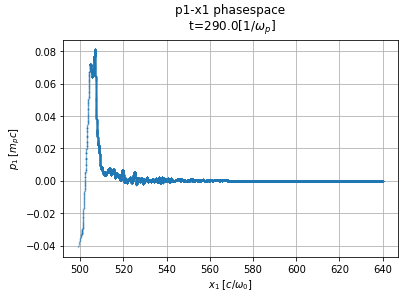

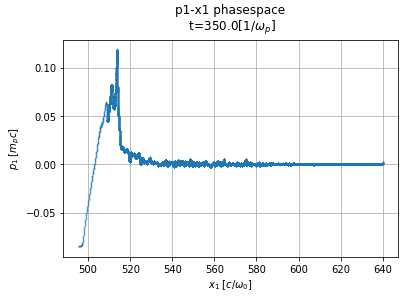

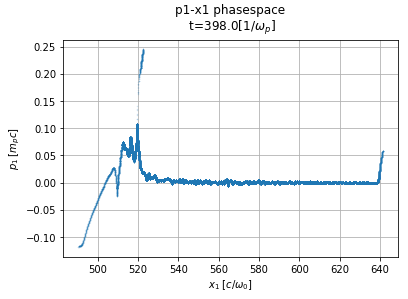

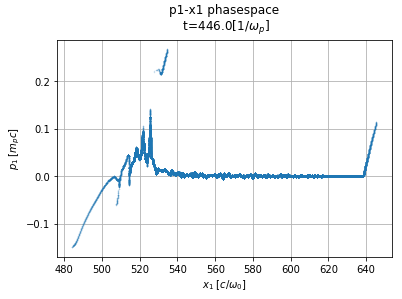

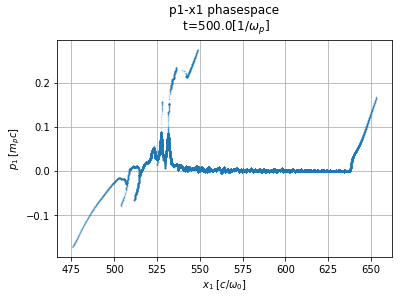

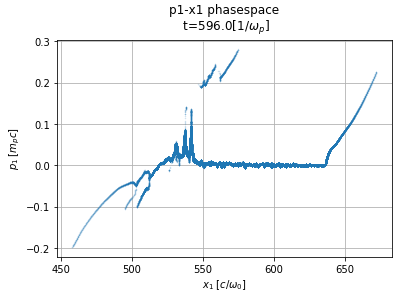

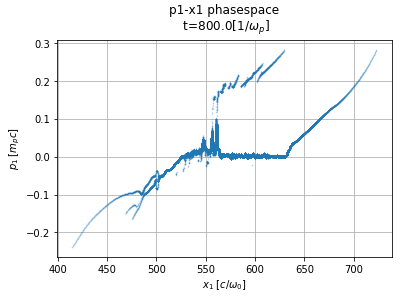

In [14]:
Drawphasespace(290)
Drawphasespace(350)
Drawphasespace(400)
Drawphasespace(450)
Drawphasespace(500)
Drawphasespace(600)
Drawphasespace(800)

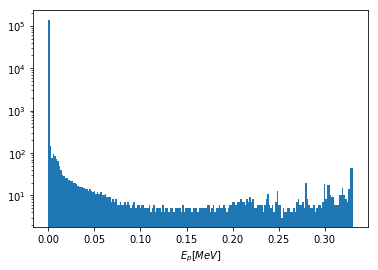

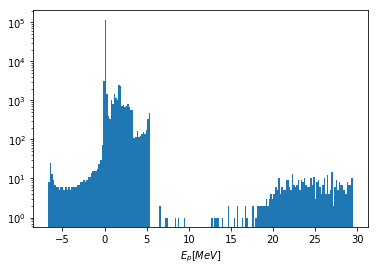

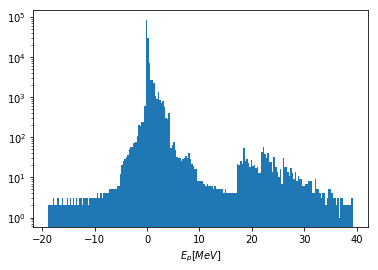

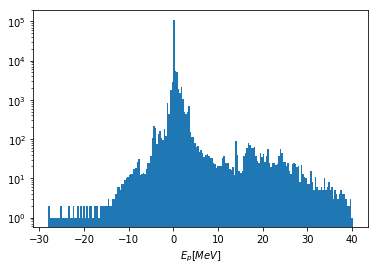

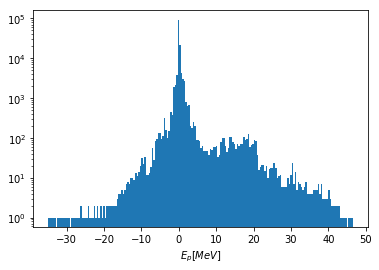

In [11]:
DrawEnergyH(200)
DrawEnergyH(400)
DrawEnergyH(600)
DrawEnergyH(800)
DrawEnergyH(990)

## Simulation in 2 Dimentions 

Using the same parameters as the article: $\lambda_0 = 1\mu m = 2\pi \frac{c}{\omega_0}$, so $\omega_0 = \frac{2\pi c}{\lambda_0}=1.88\times10^{15}s^{-1}$, and so $1 fs = 1.885 \frac{1}{\omega_0}$.

The number of particle sper cell is 16.

The target is cold: $T_e=T_i=0$.

Initial position: $20\times2\pi c/\omega_0=125c/\omega_0$ and the final position is $(20+11)\times2\pi c/\omega_0=195c/\omega_0$.

The target density is $n_{e0}=10n_{cr} => \omega_{e0}=\sqrt{10}\omega_0$

The cell size is given by:
$\frac{2\pi c}{20 \omega_{pe0}}=\frac{\pi c}{10 \sqrt{10} \omega_0} = 0.1 \frac{c}{\omega_0}$

The laser pulse duration $\tau_{laser}=100fs= 188.5 1/\omega_0$ and $a_0=16$

In [2]:
import numpy as np
import em2d
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from ipywidgets import interactive, widgets, fixed

In [3]:
dt=0.14 #time step
tmax=500 #final time 

nx=[500/0.2,180/0.2]    #number of cells
box=[500,180] #size of simulation box

In [4]:
start_pos=390
end_pos=460
den=10
density = em2d.Density(n=den, type = "slab", start = start_pos, end = end_pos )

In [5]:
sp_name="electrons"
ppc = [4,4] # Particles per cell
electrons = em2d.Species( sp_name, -1.0, ppc,density=density)

sp_name="protons"
ppc = [4,4] # Particles per cell
protons = em2d.Species( sp_name, 1836.2, ppc,density=density)

In [6]:
sim = em2d.Simulation( nx, box, dt, species=[electrons,protons])    

In [7]:
sim.add_laser( em2d.Laser( type = "gaussian", start = 377, fwhm = 188.5 , a0 = 16.0, omega0 = 1, 
                           W0 =31 , focus = 400, axis =90 , polarization = np.pi/2 ))

In [8]:
sim.run( tmax )


Running simulation up to t = 500 ...
n = 3572, t = 500.08
Done.


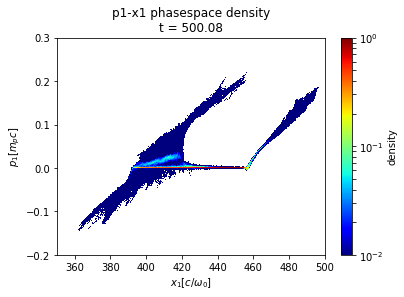

In [9]:
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

range = [[0,sim.box[0]],[-0.2,0.3]]

pha = np.abs(protons.phasespace( ['x1','u1'], nx, range ))
pha /= np.max(pha)

plt.imshow( pha, origin = 'lower',
          extent = ( range[0][0], range[0][1], range[1][0], range[1][1] ),
          aspect = 'auto', cmap = 'jet', norm=LogNorm(vmin = 0.01))
plt.colorbar().set_label('density')
plt.xlabel("$x_1 [c/\omega_0]$")
plt.ylabel("$p_1[m_p c]$")
plt.xlim(350,500)
plt.title("p1-x1 phasespace density\nt = {:g}".format(sim.t))

plt.show()

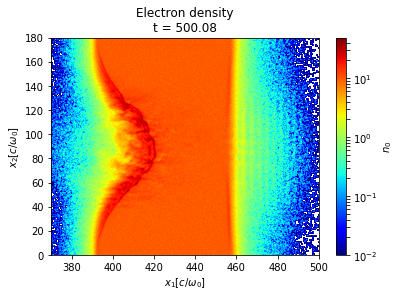

In [10]:
import matplotlib.pyplot as plt

range = [[0,sim.box[0]],[0,sim.box[1]]]

plt.imshow( np.abs(electrons.charge()), interpolation = 'bilinear', origin = 'lower',
          extent = ( range[0][0], range[0][1], range[1][0], range[1][1] ),
          aspect = 'auto', cmap = 'jet',norm=LogNorm(vmin = 0.01))

plt.xlim(370,500)
plt.colorbar().set_label('$n_0$')
plt.xlabel("$x_1 [c/\omega_0]$")
plt.ylabel("$x_2 [c/\omega_0]$")
plt.title("Electron density\nt = {:g}".format(sim.t))

plt.show()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  """Entry point for launching an IPython kernel.


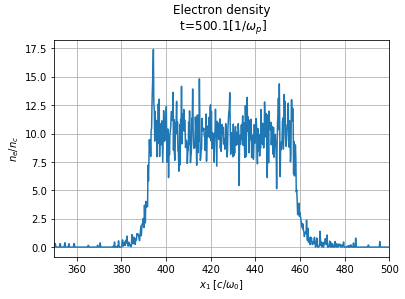

In [11]:
x=np.linspace(0,box[0],nx[0])

plt.plot(x, -electrons.charge()[90])
plt.xlabel("$x_1\;[c/\omega_0]$")
plt.ylabel("$n_e/n_c$")
plt.xlim(350,500)
plt.title('Electron density\n t={:.4}[$1/\omega_p$]'.format(sim.t))
plt.grid(True)
plt.show()
